Pb 212 - 238


Ac 228 - 911


Ti 208 - 2614 keV

Here's that one pdf I found for reference gamma energies: https://www.fmf.uni-lj.si/~jazbinsek/Praktikum5/gammaenergies.pdf

 scp dosenet@dosenet.dhcp.lbl.gov:data/thorium_test_2019-02-19_D3S.csv .

### First we import data and create summed plot:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

csv = np.genfromtxt('thorium_test_2019-02-19_D3S.csv', delimiter= ",").T

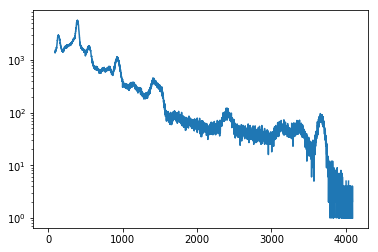

In [2]:
summed = np.sum(csv[:-1], axis=1) # gets rid of last value
plt.plot(summed)
plt.yscale('log')
plt.show()

### Now we find the peak at Pb-212 ~ 238 keV:

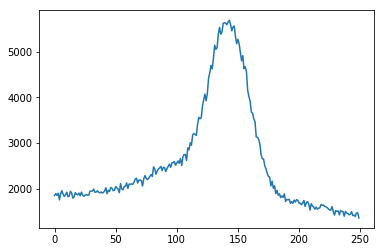

In [3]:
Pb_shift = 250
Pb_range = 250
Pb_sample = summed[Pb_shift: Pb_shift + Pb_range]
plt.plot(Pb_sample)
plt.show()

[ 3711.38581532   140.31213021    18.14922539  1858.50233389]


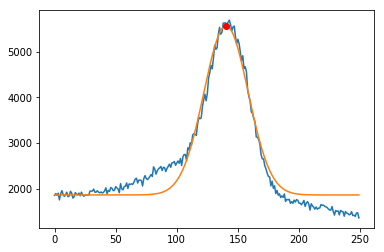

In [4]:
Pb_mu = np.mean(Pb_sample)
Pb_sig = np.std(Pb_sample)


def func(x, a, m, s, c):
    return a * np.exp(-(x - m)**2 / (2 * s**2)) + c                                      

Pb_xdata = range(Pb_range)
trydata = func(Pb_sample, np.max(Pb_sample), Pb_mu, Pb_sig, np.max(Pb_sample) + 50)

p0 = [4000,140,75,1500]
Pb_popt, Pb_pcov = curve_fit(func, Pb_xdata, Pb_sample, p0)

print(Pb_popt)
plt.plot(Pb_xdata, Pb_sample)
plt.plot(Pb_xdata, func(Pb_xdata, *Pb_popt))


plt.plot(int(Pb_popt[1]), func(Pb_xdata, *Pb_popt)[int(Pb_popt[1])], 'ro')

Pb_channel = Pb_shift + int(Pb_popt[1])

plt.show()


### This is good enough for now but we can fix l8tr if needed

390


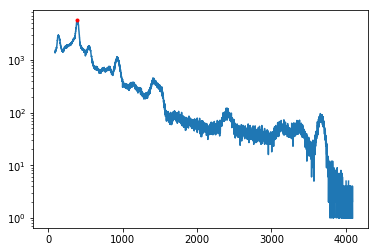

In [5]:
plt.plot(summed)
plt.plot(Pb_channel, summed[Pb_channel], 'r.')
plt.yscale('log')
print(Pb_channel)
plt.show()

expected: 238 keV, channel: 390

### Now for Ac-228:

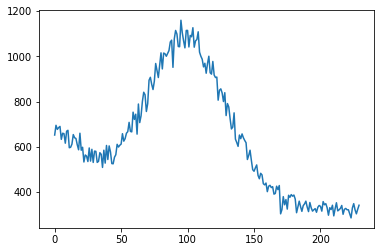

In [6]:
Ac_shift = 830
Ac_range = 230
Ac_sample = summed[Ac_shift: Ac_shift + Ac_range]
plt.plot(Ac_sample)
plt.show()

[ 661.26451048   95.04808956   31.46443293  402.44415169]


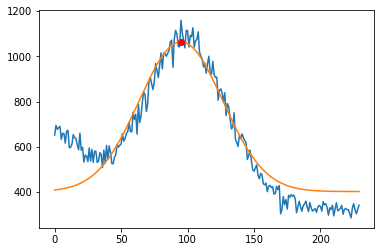

In [7]:
Ac_mu = np.mean(Ac_sample)
Ac_sig = np.std(Ac_sample)
Ac_xdata = range(Ac_range)
Ac_trydata = func(Ac_sample, np.max(Ac_sample), Ac_mu, Ac_sig, np.max(Ac_sample) + 50)

Ac_p0 = [700,100,25,300]
Ac_popt, Ac_pcov = curve_fit(func, Ac_xdata, Ac_sample, Ac_p0)

print(Ac_popt)
plt.plot(Ac_xdata, Ac_sample)
plt.plot(Ac_xdata, func(Ac_xdata, *Ac_popt))


plt.plot(int(Ac_popt[1]), func(Ac_xdata, *Ac_popt)[int(Ac_popt[1])], 'ro')

Ac_channel = Ac_shift + int(Ac_popt[1])

plt.show()


925


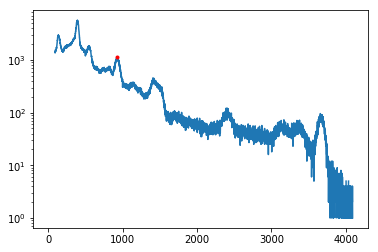

In [8]:
plt.plot(summed)
plt.plot(Ac_channel, summed[Ac_channel], 'r.')
plt.yscale('log')
print(Ac_channel)
plt.show()

Expected: 911 keV, channel: 925

### Finally, Ti-208:

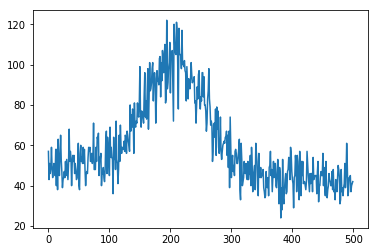

In [9]:
Ti_shift = 2200
Ti_range = 500
Ti_sample = summed[Ti_shift: Ti_shift + Ti_range]
plt.plot(Ti_sample)
plt.show()

This one's a lot noisier than the others.

[  55.74344192  204.90597404   51.96684107   45.41210657]


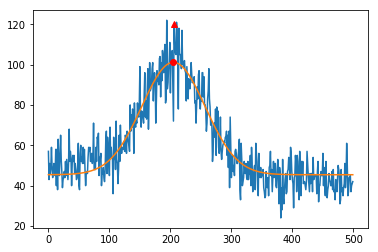

In [10]:
Ti_mu = np.mean(Ti_sample)
Ti_sig = np.std(Ti_sample)
Ti_xdata = range(Ti_range)
Ti_trydata = func(Ti_sample, np.max(Ti_sample), Ti_mu, Ti_sig, np.max(Ti_sample) + 50)

Ti_p0 = [80,200,20,50]
Ti_popt, Ti_pcov = curve_fit(func, Ti_xdata, Ti_sample, Ti_p0)

print(Ti_popt)
plt.plot(Ti_xdata, Ti_sample)
plt.plot(Ti_xdata, func(Ti_xdata, *Ti_popt))


plt.plot(int(Ti_popt[1]), func(Ti_xdata, *Ti_popt)[int(Ti_popt[1])], 'ro')

maxish = max(Ti_sample[int(Ti_popt[1]) - 5: int(Ti_popt[1]) + 5])
x_maxish = np.argmax(Ti_sample[int(Ti_popt[1]) - 5: int(Ti_popt[1]) + 5]) + int(Ti_popt[1]) - 5

plt.plot(x_maxish, maxish, 'r^')


Ti_channel = Ti_shift + x_maxish

plt.show()

I didn't like how the channel dot wasn't on top of the peaks so I just changed the x position to be within 10 indices of the mean index.

2406


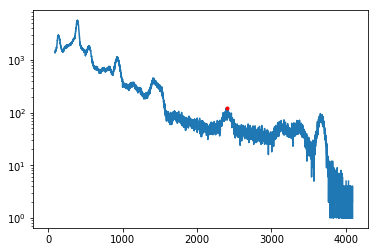

In [11]:
plt.plot(summed)
plt.plot(Ti_channel, summed[Ti_channel], 'r.')
plt.yscale('log')
print(Ti_channel)
plt.show()

### Okay but what about the peak at ~3700?

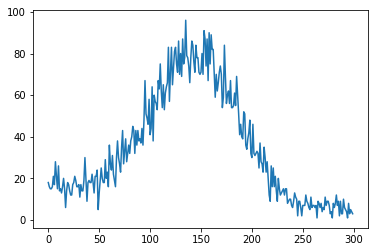

In [12]:
z_shift = 3525
z_range = 300
z_sample = summed[z_shift: z_shift + z_range]
plt.plot(z_sample)
plt.show()

[  70.89321172  141.10618694   42.8189948     9.16115854]


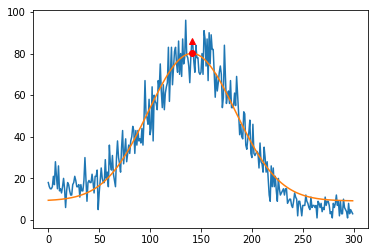

In [13]:
z_mu = np.mean(z_sample)
z_sig = np.std(z_sample)
z_xdata = range(z_range)
z_trydata = func(z_sample, np.max(z_sample), z_mu, z_sig, np.max(z_sample) + 50)

z_p0 = [900,180,20,15]
z_popt, z_pcov = curve_fit(func, z_xdata, z_sample, z_p0)

print(z_popt)
plt.plot(z_xdata, z_sample)
plt.plot(z_xdata, func(z_xdata, *z_popt))


plt.plot(int(z_popt[1]), func(z_xdata, *z_popt)[int(z_popt[1])], 'ro')

z_maxish = max(z_sample[int(z_popt[1]) - 5: int(z_popt[1]) + 5])
x_z_maxish = np.argmax(z_sample[int(z_popt[1]) - 5: int(z_popt[1]) + 5]) + int(z_popt[1]) - 5

plt.plot(x_z_maxish, z_maxish, 'r^')


z_channel = z_shift + x_z_maxish


plt.show()


Same here I didn't like how the fit doesnt touch the top of the peaks but irl it makes only aesthetic difference since the offset is so little.

3666


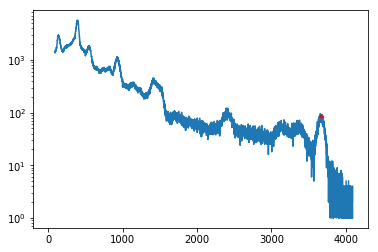

In [14]:
plt.plot(summed)
plt.plot(z_channel, summed[z_channel], 'r.')
plt.yscale('log')
print(z_channel)
plt.show()

## Ok now with all the values:


#### From left to right: Pb-212, Ac-228, Ti-208, and the 'mystery z-peak'.

390 925 2406 3666
5635.0 1159.0 120.0 86.0


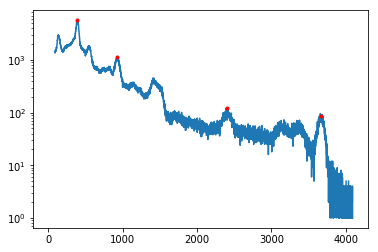

In [16]:
plt.plot(summed)
plt.plot(Pb_channel, summed[Pb_channel], 'r.')
plt.plot(Ac_channel, summed[Ac_channel], 'r.')
plt.plot(Ti_channel, summed[Ti_channel], 'r.')
plt.plot(z_channel, summed[z_channel], 'r.')
plt.yscale('log')
print(Pb_channel, Ac_channel, Ti_channel, z_channel)
print(summed[Pb_channel], summed[Ac_channel], summed[Ti_channel], summed[z_channel])
plt.show()